## TP : Analyse Spectrale

### 1. Puissance itérée et méthode de déflation

* **Principe**

La méthode de la puissance itérée consiste à calculer la suite :

$x_{k+1} = \frac{A_{x_{k}}}{||A_{x_{k}}||}$

qui va converger vers un vecteur propre associé à la valeur propre de plus grand module $\lambda_{1}$.

* **Fonctionnement**

*Méthode de la puissance itérée*

``1.`` Choisir un vecteur initial non nul $x_0$


``2.`` Calculer : $A \times x_{0}$


``3.`` Normalisation : $\frac{A_{x_{0}}}{||A_{x_{0}}||}$


``4.`` Calculer : $\frac{x^{T}Ax}{x^{T}x}$


``5.`` Répéter ``2 & 3`` jusqu'à ce que le vecteur obtenu converge vers $\lambda_{1}$


Pour trouver les autres valeurs propres :

*Méthode de déflation* 

``5.`` Calculer $v_{1} = Ax_{0} - (x_{0}.T \times Ax_{0}) \times x_{0}$

``6.`` Normalisation : $v_{1} = \frac{v_{1}}{||v_{1}||}$

``7.`` On applique à nouveau la méthode par puissance itérée en prenant ``v1`` comme vecteur initial.

In [1]:
# Implémentation PYTHON
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import math

A   = np.matrix([[3, 4, 0], [1, 3, 0], [0, 0, 2]])
eps = 1e-15
x0  = np.matrix([2, 1, 1]).T

print("A = ")
print(A)

A = 
[[3 4 0]
 [1 3 0]
 [0 0 2]]


``Q1.``

In [2]:
# Méthode de la puissance itérée
def iterpow(A, x0, eps):
    v_anc  = 0
    v_cour = 1
    y       = x0
    nb_iter = 0
 
    while (abs(v_cour - v_anc) > eps):
        nb_iter+=1
        v_anc = v_cour
        x = y/np.linalg.norm(y)
        y = A@x
        v_cour = (x.T*y)[0,0] / (x.T*x)[0,0]
        
    return v_cour, x, nb_iter

In [3]:
v1, eigen_vector, nb_iter = iterpow(A, x0, eps)
print("\n * Lambda 1 : ")
print(v1)
print("\n * Vecteur propre associé à lambda 1 :")
print(eigen_vector)
print("\n * Nombre d'itérations : ")
print(nb_iter)



 * Lambda 1 : 
5.0

 * Vecteur propre associé à lambda 1 :
[[8.94427191e-01]
 [4.47213595e-01]
 [4.91716548e-09]]

 * Nombre d'itérations : 
21


In [4]:
# Tests multiples

# Matrices
A1 = np.array([[4, -1], [2, 1]])
A2 = np.array([[0, 2, 3], [0, 5, 0], [0, 8, 0]])
A3 = np.array([[3, 1, 0], [1, 2, 1], [0, 1, 3]])

params = [(A1, np.matrix([1, 1]).T, eps),
          (A2, np.matrix([1, 1, 1]).T, eps),
          (A3, np.matrix([1, 1, 1]).T, eps)]


# Définir la fonction de test
def test_iterpow():
    for A, x0, eps in params:
        v_cour, eigen_vector, nb_iter = iterpow(A, x0, eps)
        print("Matrice de test :")
        print(A)
        print("Vecteur propre associé à la valeur propre {:.1f} :".format(v_cour))
        print(eigen_vector)
        print("Nombre d'itérations :", nb_iter)
        print()

In [5]:
# Exécuter la fonction de test
test_iterpow()

Matrice de test :
[[ 4 -1]
 [ 2  1]]
Vecteur propre associé à la valeur propre 3.0 :
[[0.70710678]
 [0.70710678]]
Nombre d'itérations : 2

Matrice de test :
[[0 2 3]
 [0 5 0]
 [0 8 0]]
Vecteur propre associé à la valeur propre 5.0 :
[[0.58473129]
 [0.42994948]
 [0.68791916]]
Nombre d'itérations : 4

Matrice de test :
[[3 1 0]
 [1 2 1]
 [0 1 3]]
Vecteur propre associé à la valeur propre 4.0 :
[[0.57735027]
 [0.57735027]
 [0.57735027]]
Nombre d'itérations : 2



``Q2.`` Trace de la vitesse de convergence de la méthode

In [27]:

def iterpow_trace(A, x0, eps):
    v_anc  = 0
    v_cour = 1
    y       = x0
    nb_iter = 0
    conv = []
 
    while (abs(v_cour - v_anc) > eps):
        nb_iter+=1
        v_anc = v_cour
        x = y/np.linalg.norm(y)
        y = A@x
        v_cour = (x.T*y)[0,0] / (x.T*x)[0,0]
        diff = abs(v_cour - v_anc)
        if(diff > 0):
            conv.append(math.log10(diff))
 
    print(conv)
    plt.plot(range(1, nb_iter), conv)
    plt.title('Vitesse de convergence')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('log10')
    plt.show()
    
    return v_cour, x, nb_iter


[0.5440680443502757, -0.3904304068932923, -1.1093470929081504, -1.8919030413551186, -2.6856220640967097, -3.481155560768471, -4.276980115232959, -5.072851258055696, -5.868729855166982, -6.664609647273213, -7.460489644570413, -8.256369483720082, -9.052249588073135, -9.848135043512938, -10.643989910235076, -11.439882672644723, -12.235922034874793, -13.02619391793429, -13.847379800543134, -14.574378528479397]


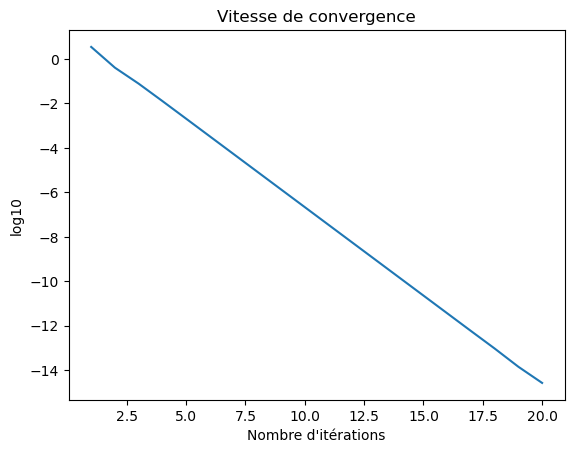

(5.0,
 matrix([[8.94427191e-01],
         [4.47213595e-01],
         [4.91716548e-09]]),
 21)

In [28]:
iterpow_trace(A, x0, eps)

``Q3.`` ``Méthode de déflation``

In [10]:

def deflation(A, x0, eps):
    n = A.shape[0] 
    eigvals = []
    eigvect = []

    for i in range(n):
        v, x, nb_iter = iterpow(A, x0, eps)
        eigvals.append(v)
        eigvect.append(x)
        
        A = A - v*((x@x.T)/(x.T@x))
        
    return eigvals, eigvect


In [11]:
deflation(A, x0, eps)

([5.0, 2.0, 1.0000000000000004],
 [matrix([[8.94427191e-01],
          [4.47213595e-01],
          [4.91716548e-09]]),
  matrix([[-1.09951162e-08],
          [-5.49755807e-09],
          [ 1.00000000e+00]]),
  matrix([[ 7.07106781e-01],
          [ 7.07106781e-01],
          [-1.92296273e-16]])])

In [12]:

# Test 1
A1 = np.matrix([[0, 3], [3, -8]])
x0 = np.matrix([1, 1]).T
eps = 1e-15

eigval, eigvect = deflation(A1, x0, eps)
print("\nValeurs propres attendues : [-9 1] / Valeurs propres trouvées : \n", eigval)

# Test 2
A2 = np.matrix([[2, 0, 1], [0, 2, 0], [1, 0, 2]])
x2 = np.matrix([2, 1, 1]).T
eps = 1e-15
eigval, eigvect = deflation(A2, x2, eps)
print("\nValeurs propres attendues : [3 2 1] / Valeurs propres trouvées : \n", eigval)

# Test 3
A3 = np.matrix([[2, 1, 1], [1, 2, 1], [1, 1, 2]])
x3 = np.matrix([4, 1, 1]).T
eps = 1e-15
eigval, eigvect = deflation(A3, x3, eps)
print("\nValeurs propres attendues : [4 1 1] / Valeurs propres trouvées : \n", eigval)



Valeurs propres attendues : [-9 1] / Valeurs propres trouvées : 
 [-9.000000000000002, 1.0000000000000002]

Valeurs propres attendues : [3 2 1] / Valeurs propres trouvées : 
 [2.9999999999999996, 2.0000000000000004, 1.0000000000000002]

Valeurs propres attendues : [4 1 1] / Valeurs propres trouvées : 
 [4.0, 0.9999999999999997, 0.9999999999999999]


## 2. PageRank de Google

``Q1.``

La matrice d'adjacence G est définie comme suit : 

* $G_{i,j} = 1$ si sur la page $j$ il y a un lien vers la page $i$

* $G_{i,j} = 0$ sinon.

In [38]:
# Lecture du fichier "webgraph.dat"

def read(filename):
    with open(filename, 'r') as f:
        lines = [line.strip().split() for line in f.readlines()]
    f.close()
    
    # Matrice d'adjacence
    G = np.zeros((500, 500)).T
    
    for l in lines:
        i, j     = int(l[0]) - 1, int(l[1]) - 1
        G[i][j]  = 1
    
    return G

In [39]:
G = read('webgraph.dat')
print(G)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


``Q2.``

Le paramètre $d$ est choisi entre 0 et 1.

In [40]:
def transition_probabiliste(G, d):
    n = np.shape(G)[0]
    A = np.zeros((n, n))

    for j in range(n):
        # Nombre de liens sortants de la page j
        lj = np.count_nonzero(G[j,:])

        # Si la page j n'a pas de lien sortant, la probabilité est uniforme
        if lj == 0:
            A[:,j] = 1/n
            
        # Sinon, calculer la probabilité en fonction des liens sortants
        else:
            for i in range(n):
                if G[j,i] == 1:
                    A[i,j] = (1-d)*G[j,i]/lj + d/n
                else:
                    A[i,j] = d/n
                    
    return np.matrix(A)

In [41]:
AP = transition_probabiliste(G, 0.7)
print(AP)

[[0.0014     0.002      0.0134     ... 0.02015    0.02015    0.0214    ]
 [0.01251111 0.002      0.0134     ... 0.02015    0.02015    0.0214    ]
 [0.01251111 0.002      0.0014     ... 0.02015    0.02015    0.0214    ]
 ...
 [0.0014     0.002      0.0014     ... 0.0014     0.02015    0.0014    ]
 [0.0014     0.002      0.0014     ... 0.02015    0.0014     0.0014    ]
 [0.0014     0.002      0.0014     ... 0.0014     0.0014     0.0014    ]]


In [42]:
# Définir la popularité des pages

x0 = np.matrix(np.ones(500)).T
v1, p, nb_iter = iterpow(AP, x0, 1e-15)

#print(p)
print("* Valeur propre de + grand module : ", v1)
#print("* Vecteur propre associé : ", p)


* Valeur propre de + grand module :  1.0000000000000016


``Pour déterminer les pages les plus populaires, nous trions les éléments de p par ordre décroissant.``

In [43]:
# Tri décroissant sur p 
popularity = np.argsort(p, axis=0)[::-1]

# Affichage des 20 pages les + populaires
for i in range(20):
    page_index = popularity[i, 0] + 1
    print(page_index)


1
2
9
3
12
5
8
13
6
11
4
28
7
10
295
350
16
26
17
18


``Q4.``


In [44]:
def system_eigenval(A):
    b = np.linalg.solve(A - np.eye(500), np.zeros(500))
    return b

In [45]:
res = system_eigenval(AP)

In [46]:
# Mesure du temps d'exécution
import time

In [51]:
# np.linalg.solve()
start = time.perf_counter()
for i in range(1000):
    system_eigenval(AP)
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  5.930324799999994  secondes


In [67]:
start = time.perf_counter()
for i in range(1000):
    p = system_eigenval(AP)
    # Tri décroissant sur p 
    popularity = np.argsort(p, axis=0)[::-1]
    # Affichage des 20 pages les + populaires
    for k in range(20):
        page_index = popularity[k] + 1
        #print(page_index)
    
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  6.1802712999999585  secondes


In [68]:
start = time.perf_counter()
x0 = np.matrix(np.ones(500)).T
for i in range(1000):
    AP = transition_probabiliste(G, 0.7)

    _, p, _ = iterpow(AP, x0, 1e-15)

    # Tri décroissant sur p 
    popularity = np.argsort(p, axis=0)[::-1]

    # Affichage des 20 pages les + populaires
    for i in range(20):
        page_index = popularity[i, 0] + 1
        #print(page_index)
    
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  265.1777978  secondes
